In [108]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc
from scipy.io import wavfile
import pandas as pd

In [109]:
def pitchcorr(x,fm):
    T=1/fm

    pmin=50
    pmax=300

    Tmin=1/pmax
    Tmax=1/pmin

    nmin=int(np.floor(Tmin/T))
    nmax=int(np.ceil(Tmax/T))

    xc=np.correlate(x, x, mode='full')
    xc=xc[len(x):]

    i = np.argmax(xc[nmin:nmax])

    npitch=i+nmin
    Tpich=npitch*T

    fpitch=1/Tpich
    return fpitch

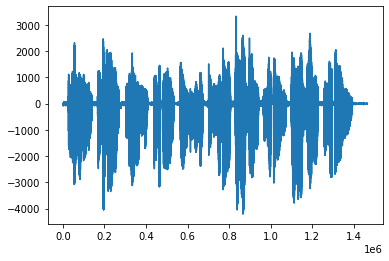

In [110]:
fs,s=wavfile.read('./dataset_proyecto/vocadito_1.wav');
plt.plot(s)

fm=fs;
x=s;

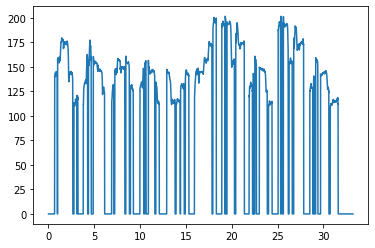

In [120]:
ref=pd.read_csv('./dataset_proyecto/vocadito_1_f0.csv');
ax=ref["0.0"]
ay=ref["0.0.1"]
plt.plot(ax,ay)

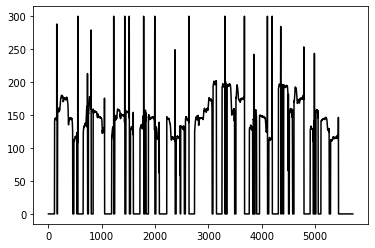

In [114]:
tvent = 0.032
tstep=0.005804988662131519

nvent=int(np.floor(tvent*fm))
nstep=int(np.floor(tstep*fm))

nframes=int(np.floor( (len(x)-nvent-nvent/2-nstep) /nstep))

pcorr=np.zeros(nframes)
ini=int(np.floor(nvent/2))
vent=sc.boxcar(nvent)

for k in range(nframes):
  if ay[k]>0:
   pcorr[k]=pitchcorr(x[ini:ini+nvent]*vent,fm)
  ini=ini+nstep

plt.plot(pcorr,'k')

Pitch shift usando STFT

In [ ]:
f, t, z = sc.stft(signal, rate, vent, nperseg = tamanioVent, noverlap = tamanioVent**0.75)

plt.figure()
plt.pcolormesh(t, f, abs(z), vmin = 0, shading='auto')
plt.title('STFT señal original')
plt.show()

pcorr2 = F0Estimada

ratio = F0EstimadaSegunTabla/F0Estimada
ratio[np.isnan(ratio)] = 1
S_corrected = np.zeros((len(f),len(t)))
print(ratio)
for k in range(len(t)):
    for j in range(len(f)):
        y = round(j/ratio[k])
          
        #Prevents negative indices
        if y < 1:
            y = 1
          
        #Non-constant frequency scaling
        if y <= len(f):
            S_corrected[j,k] = np.real(z[y,k])
          
        
plt.figure()
plt.pcolormesh(t, f, abs(S_corrected), vmin=0, shading='auto')
plt.show()
plt.title('STFT señal corregida')

t,signalCorregida = sc.istft(S_corrected, rate, vent, nperseg = tamanioVent, noverlap = tamanioVent**0.75)

Verificar método de shift

In [ ]:
F0Corregida = estimarF0(signalCorregida, F0Ref)

fig, ax = plt.subplots()
ax.plot(F0Corregida, label = 'F0 luego de corregir')
ax.plot(F0EstimadaSegunTabla, label = 'F0 Estimada según tabla')
legend = ax.legend(loc='lower right')
plt.title('Verificación F0 corregida')
plt.show()

sc_wav.write('test_01.wav',rate,signalCorregida.astype(np.int16))
sc_wav.write('test_02.wav',rate,signal.astype(np.int16))
rate2, senal2 = sc_wav.read('test_01.wav')

prueba day ventaneo doble

In [ ]:
rate, signal = sc_wav.read('dataset_proyecto/vocadito_1.wav')

tvent = 0.032
tstep = 0.005804988662131519

tamanioVent = int(tvent*rate)
nstep = int(tstep*rate)

cantidadVentanasRef = len(F0Ref)

ini = tamanioVent//2
vent = np.hamming(tamanioVent)

salida,numberFramesInput = createFrames(signal[ini:ini + tamanioVent]*vent,256,64)
salida2 = fusionFrames(salida,round(256*64))

salida=np.zeros((5713,1536))

for i in range(5713):
    
   #problema: distintos alfas dan distintos len en la interpolacion
    salida[i,:] = pitchShift(signal[ini:ini + tamanioVent]*vent,256,64,ratio[i])
    ini = ini + nstep    


# Para que la salida pueda tener distinta magnitud (y dsp hacer el 0padding o lo q sea)

#salida = []

#for i in range(5713):
#    print(i)
#   #problema: distintos alfas dan distintos len en la interpolacion
#    salida.append(pitchShift(signal[ini:ini + tamanioVent]*vent,256,64,ratio[i])) 
#    ini = ini + nstep